In [ ]:
%pip install torch torchvision tfrecord numpy matplotlib

In [ ]:
%env

In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, IterableDataset
from tfrecord.reader import tfrecord_loader
import numpy as np
from glob import glob
import itertools
import matplotlib.pyplot as plt
from datetime import datetime

from wildfire import *

In [4]:
print(IMG_SHAPE)

(64, 64)


Keys in TFRecord: ['vs', 'th', 'population', 'tmmx', 'PrevFireMask', 'elevation', 'sph', 'pr', 'pdsi', 'erc', 'FireMask', 'NDVI', 'tmmn']


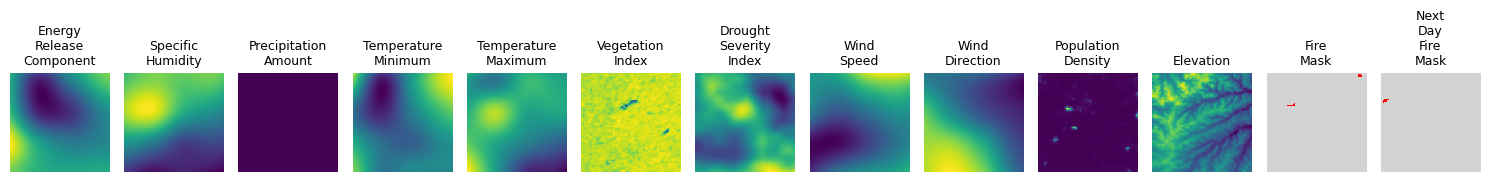

Keys in TFRecord: ['FireMask', 'pdsi', 'sph', 'th', 'pr', 'PrevFireMask', 'tmmx', 'NDVI', 'elevation', 'erc', 'population', 'vs', 'tmmn']


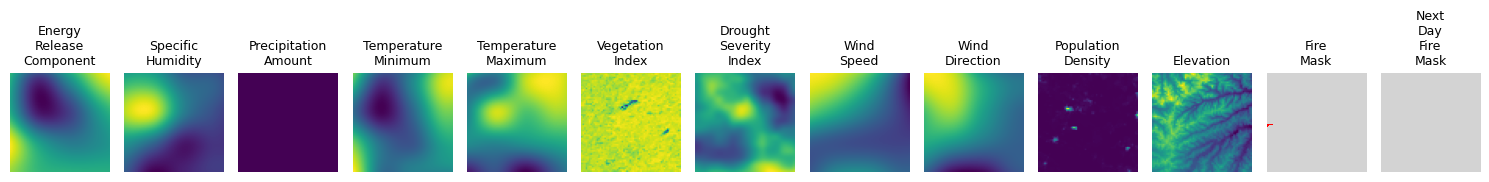

Keys in TFRecord: ['PrevFireMask', 'th', 'NDVI', 'tmmx', 'FireMask', 'erc', 'tmmn', 'population', 'pr', 'vs', 'pdsi', 'sph', 'elevation']


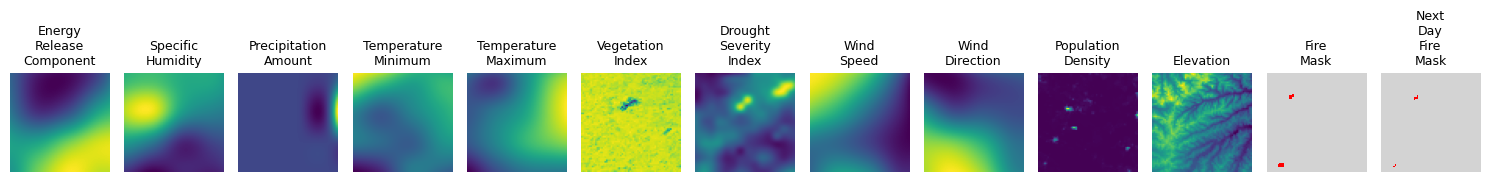

Keys in TFRecord: ['tmmn', 'population', 'tmmx', 'elevation', 'th', 'vs', 'FireMask', 'erc', 'pdsi', 'pr', 'sph', 'PrevFireMask', 'NDVI']


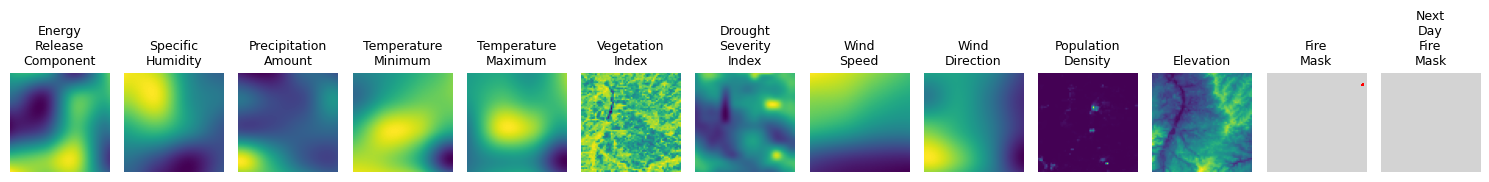

Keys in TFRecord: ['sph', 'FireMask', 'erc', 'pdsi', 'tmmx', 'elevation', 'vs', 'th', 'PrevFireMask', 'tmmn', 'NDVI', 'population', 'pr']


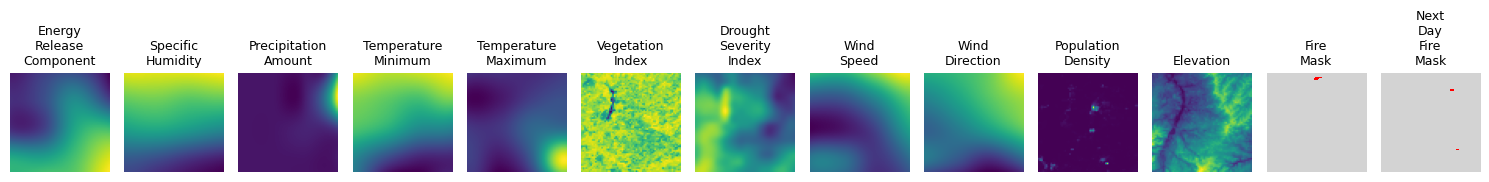

Keys in TFRecord: ['tmmn', 'tmmx', 'pr', 'sph', 'vs', 'NDVI', 'FireMask', 'pdsi', 'elevation', 'erc', 'PrevFireMask', 'th', 'population']


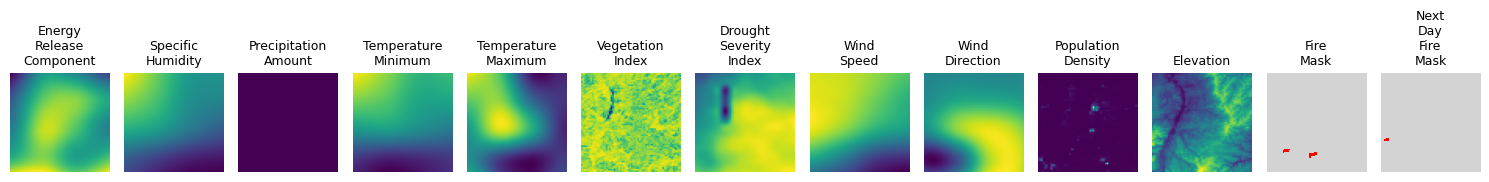

Keys in TFRecord: ['PrevFireMask', 'th', 'NDVI', 'pdsi', 'population', 'tmmx', 'FireMask', 'sph', 'vs', 'tmmn', 'erc', 'pr', 'elevation']


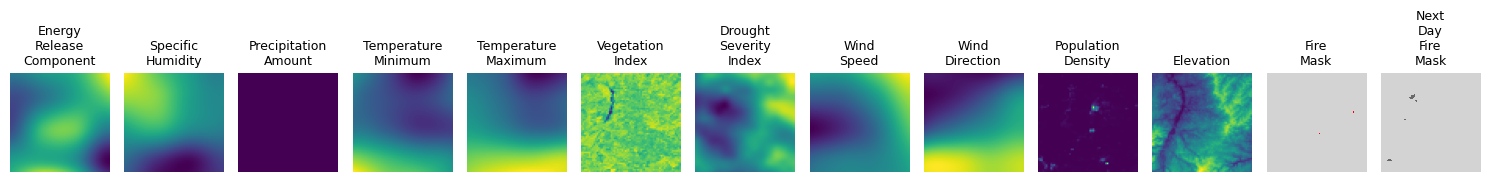

Keys in TFRecord: ['tmmn', 'elevation', 'tmmx', 'PrevFireMask', 'pr', 'NDVI', 'th', 'pdsi', 'vs', 'FireMask', 'population', 'sph', 'erc']


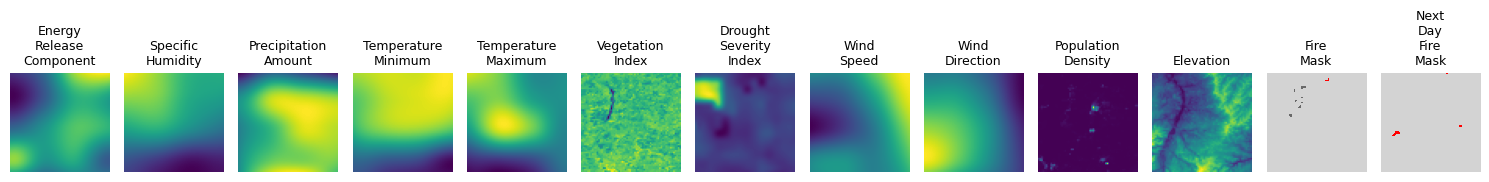

Keys in TFRecord: ['erc', 'tmmx', 'elevation', 'pr', 'pdsi', 'NDVI', 'PrevFireMask', 'sph', 'population', 'vs', 'tmmn', 'FireMask', 'th']


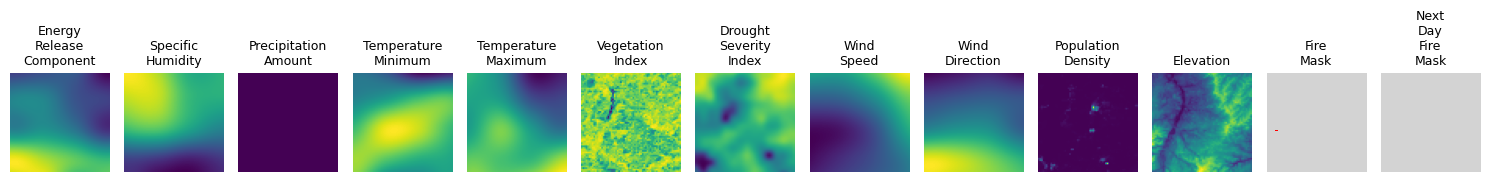

Keys in TFRecord: ['population', 'elevation', 'erc', 'PrevFireMask', 'pdsi', 'pr', 'NDVI', 'FireMask', 'th', 'vs', 'tmmn', 'sph', 'tmmx']


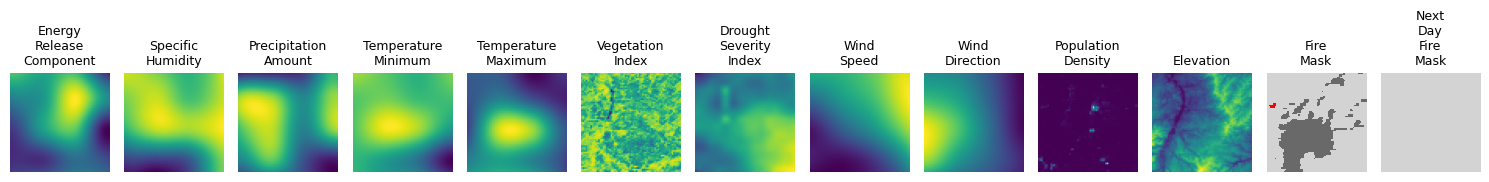

Keys in TFRecord: ['erc', 'tmmx', 'sph', 'elevation', 'th', 'FireMask', 'NDVI', 'vs', 'tmmn', 'pr', 'PrevFireMask', 'pdsi', 'population']


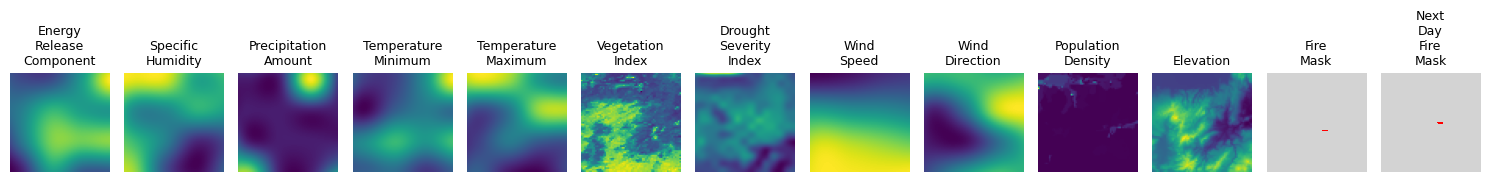

Keys in TFRecord: ['tmmx', 'vs', 'tmmn', 'pdsi', 'elevation', 'population', 'erc', 'pr', 'th', 'PrevFireMask', 'sph', 'NDVI', 'FireMask']


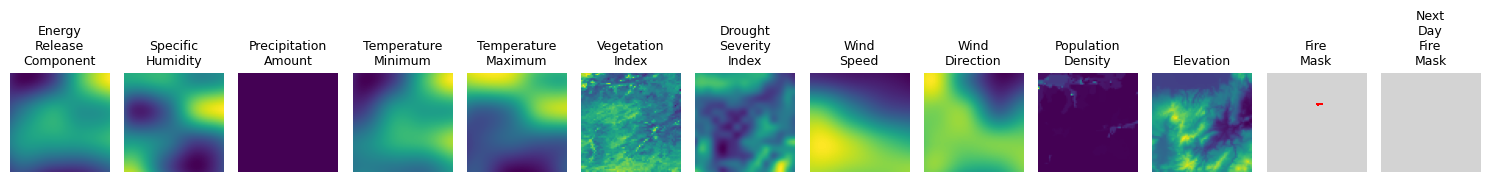

Keys in TFRecord: ['NDVI', 'tmmx', 'FireMask', 'elevation', 'pr', 'th', 'PrevFireMask', 'sph', 'vs', 'tmmn', 'population', 'pdsi', 'erc']


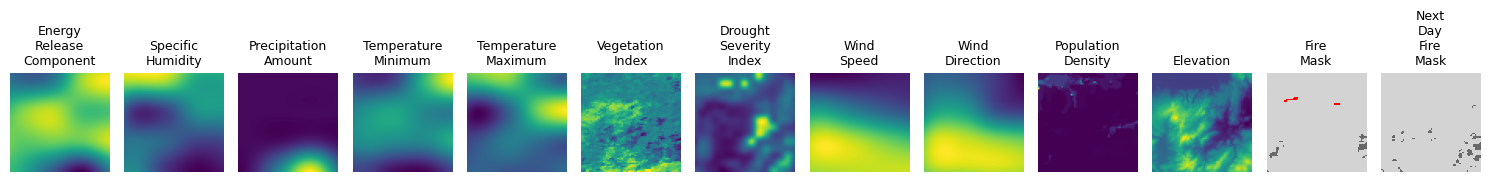

Keys in TFRecord: ['tmmx', 'elevation', 'FireMask', 'th', 'PrevFireMask', 'pdsi', 'vs', 'pr', 'NDVI', 'population', 'erc', 'sph', 'tmmn']


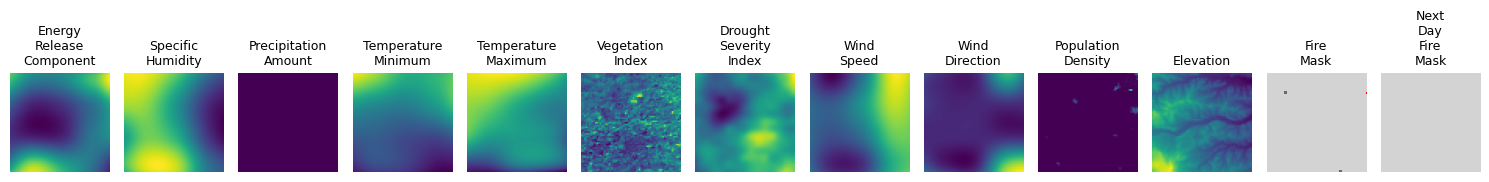

Keys in TFRecord: ['pr', 'pdsi', 'FireMask', 'NDVI', 'th', 'population', 'PrevFireMask', 'elevation', 'sph', 'tmmn', 'vs', 'tmmx', 'erc']


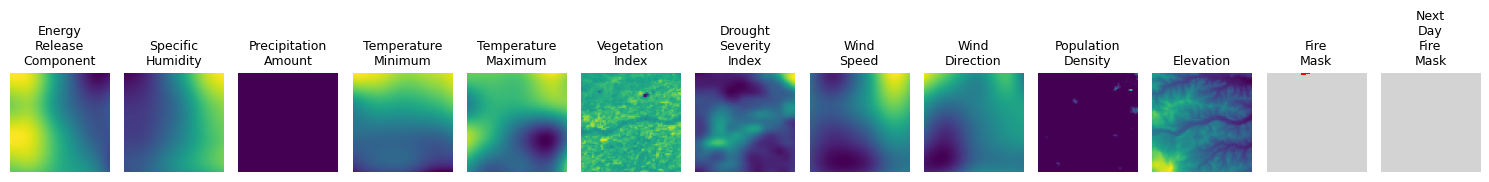

Keys in TFRecord: ['erc', 'tmmn', 'elevation', 'pdsi', 'th', 'population', 'NDVI', 'FireMask', 'tmmx', 'pr', 'sph', 'PrevFireMask', 'vs']


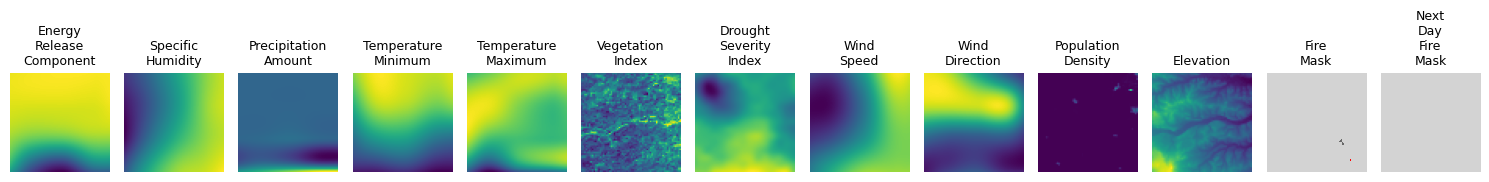

Keys in TFRecord: ['vs', 'pdsi', 'pr', 'PrevFireMask', 'sph', 'tmmx', 'NDVI', 'th', 'FireMask', 'tmmn', 'erc', 'population', 'elevation']


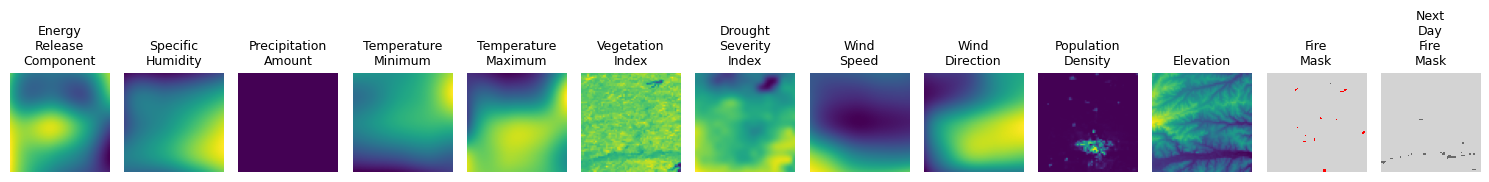

Keys in TFRecord: ['sph', 'elevation', 'population', 'vs', 'tmmn', 'pr', 'FireMask', 'tmmx', 'NDVI', 'PrevFireMask', 'erc', 'pdsi', 'th']


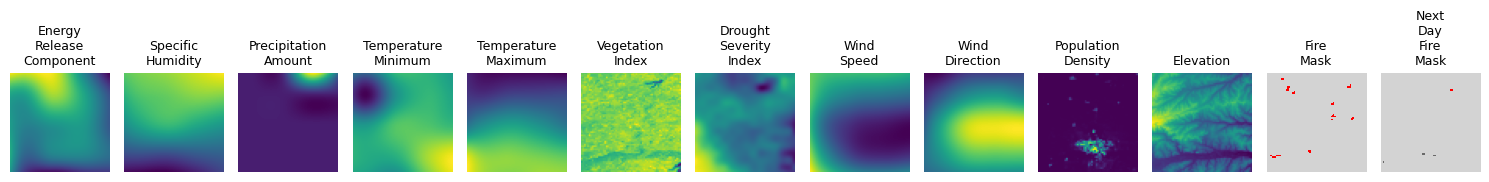

Keys in TFRecord: ['PrevFireMask', 'NDVI', 'erc', 'vs', 'elevation', 'sph', 'pr', 'th', 'population', 'tmmn', 'tmmx', 'pdsi', 'FireMask']


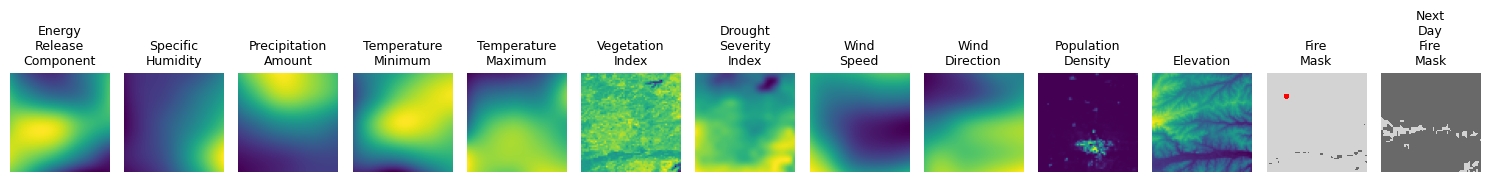

Keys in TFRecord: ['erc', 'pdsi', 'vs', 'tmmn', 'pr', 'population', 'elevation', 'th', 'tmmx', 'NDVI', 'PrevFireMask', 'FireMask', 'sph']


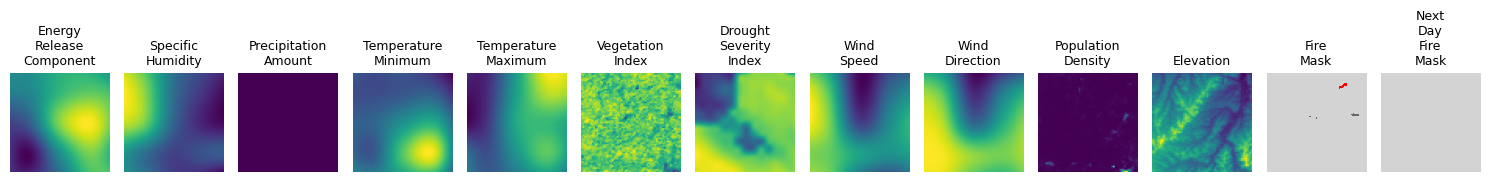

Keys in TFRecord: ['vs', 'population', 'th', 'PrevFireMask', 'pr', 'FireMask', 'sph', 'tmmn', 'elevation', 'tmmx', 'erc', 'pdsi', 'NDVI']


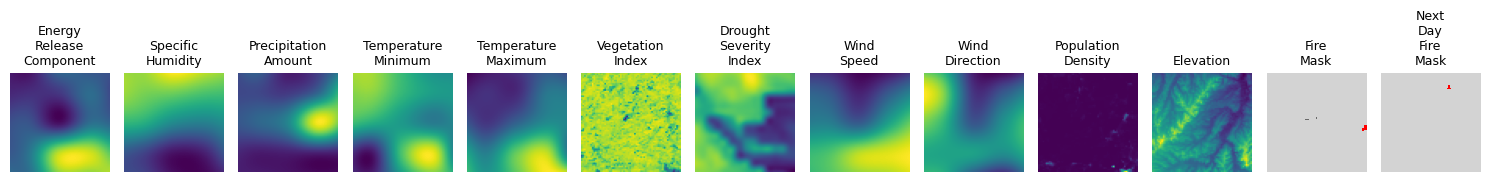

Keys in TFRecord: ['elevation', 'vs', 'sph', 'FireMask', 'PrevFireMask', 'erc', 'pdsi', 'NDVI', 'population', 'tmmx', 'th', 'pr', 'tmmn']


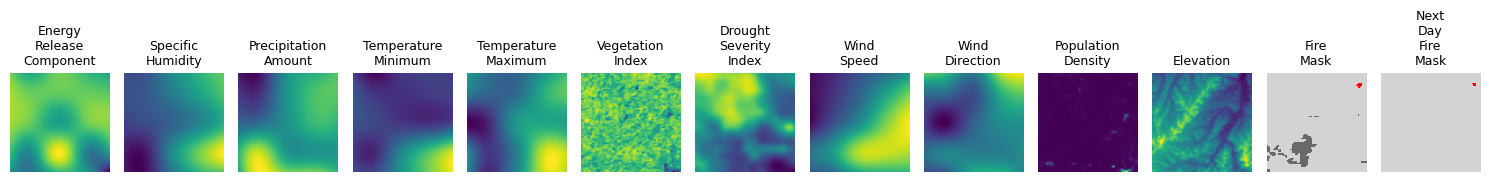

Keys in TFRecord: ['erc', 'NDVI', 'tmmx', 'vs', 'tmmn', 'FireMask', 'population', 'elevation', 'pr', 'sph', 'pdsi', 'th', 'PrevFireMask']


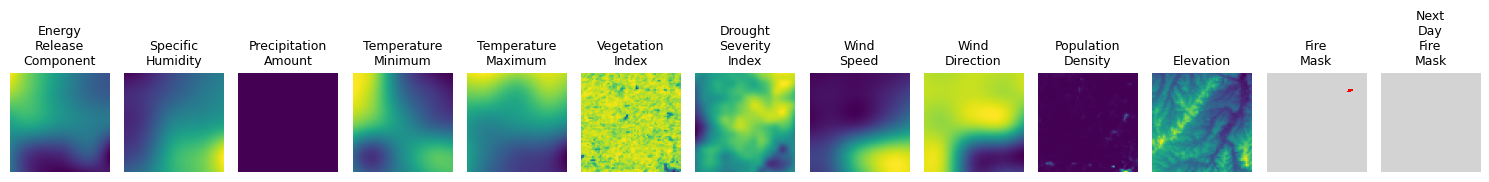

Keys in TFRecord: ['th', 'erc', 'pdsi', 'NDVI', 'tmmx', 'vs', 'FireMask', 'population', 'elevation', 'pr', 'sph', 'tmmn', 'PrevFireMask']


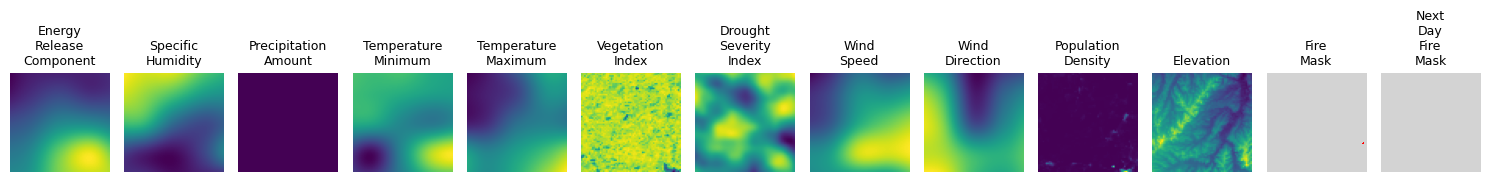

Keys in TFRecord: ['th', 'PrevFireMask', 'population', 'vs', 'FireMask', 'pdsi', 'tmmx', 'erc', 'tmmn', 'NDVI', 'sph', 'elevation', 'pr']


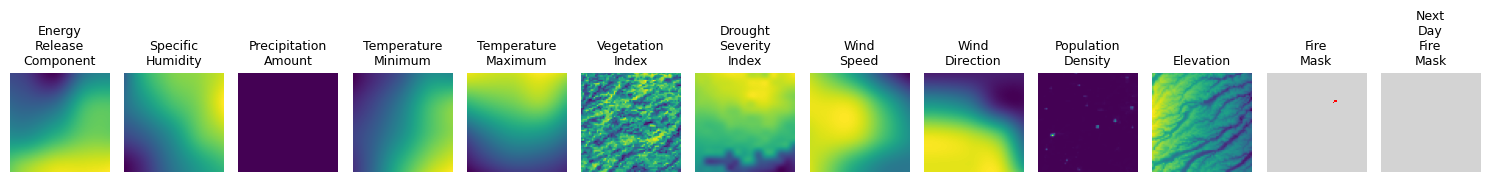

Keys in TFRecord: ['NDVI', 'elevation', 'tmmx', 'population', 'pr', 'erc', 'PrevFireMask', 'tmmn', 'vs', 'sph', 'th', 'pdsi', 'FireMask']


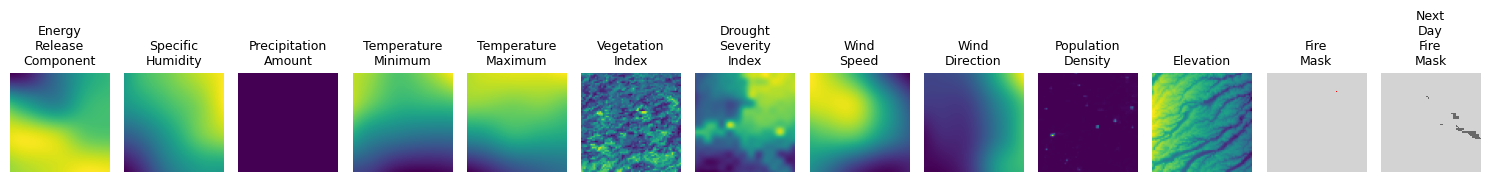

Keys in TFRecord: ['vs', 'tmmn', 'tmmx', 'NDVI', 'erc', 'sph', 'th', 'pdsi', 'FireMask', 'elevation', 'population', 'PrevFireMask', 'pr']


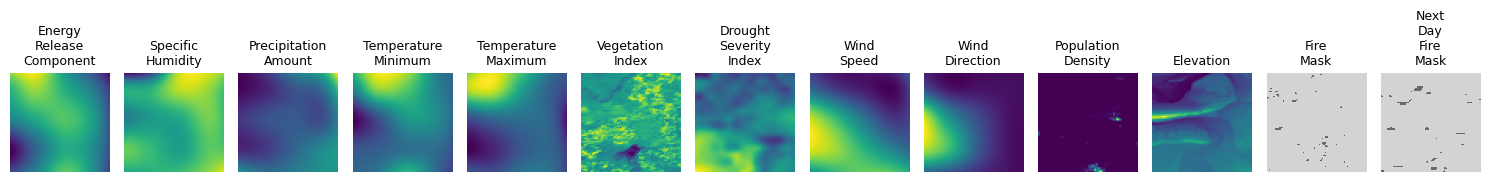

Keys in TFRecord: ['population', 'sph', 'tmmx', 'pr', 'PrevFireMask', 'elevation', 'th', 'pdsi', 'FireMask', 'NDVI', 'erc', 'tmmn', 'vs']


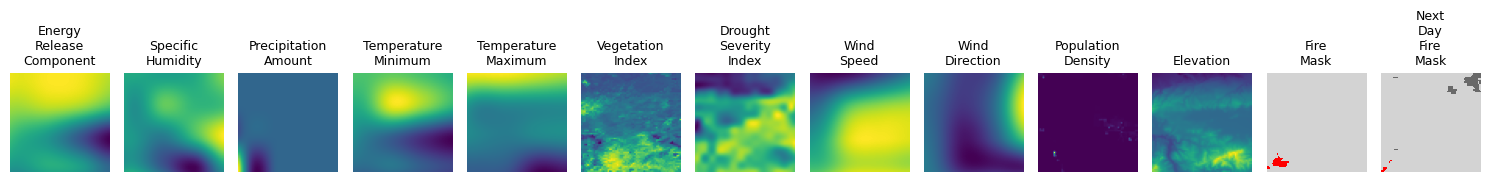

Keys in TFRecord: ['elevation', 'population', 'pr', 'PrevFireMask', 'pdsi', 'erc', 'tmmn', 'th', 'vs', 'tmmx', 'FireMask', 'NDVI', 'sph']


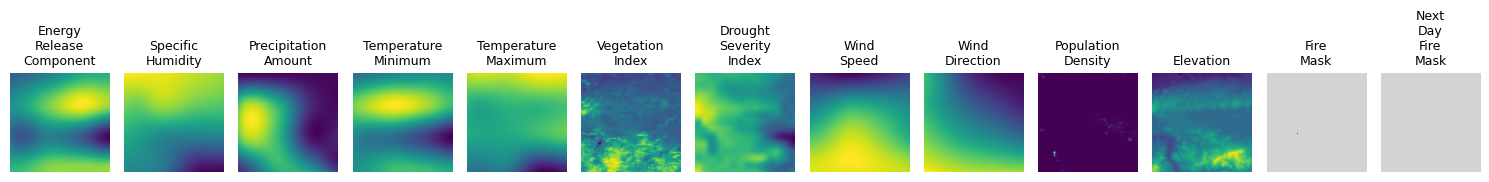

Keys in TFRecord: ['sph', 'vs', 'tmmn', 'th', 'pr', 'FireMask', 'tmmx', 'erc', 'population', 'elevation', 'PrevFireMask', 'NDVI', 'pdsi']


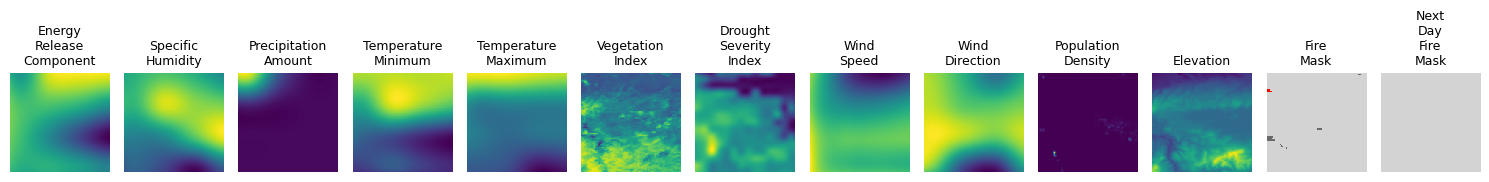

In [23]:
display_tfrecord("archive/next_day_wildfire_spread_train_00.tfrecord", n=30)

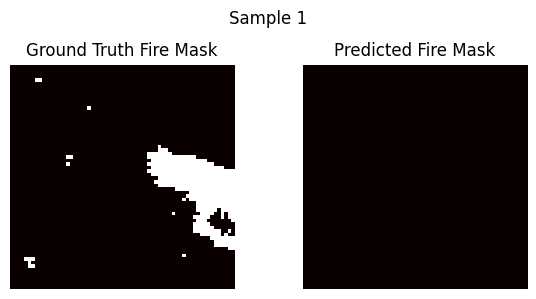

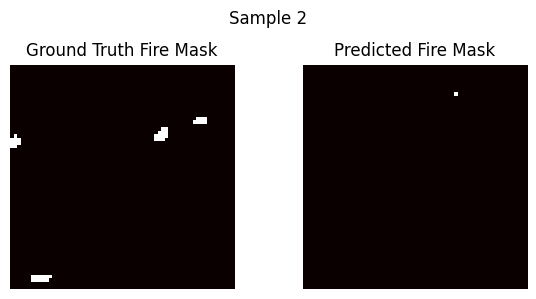

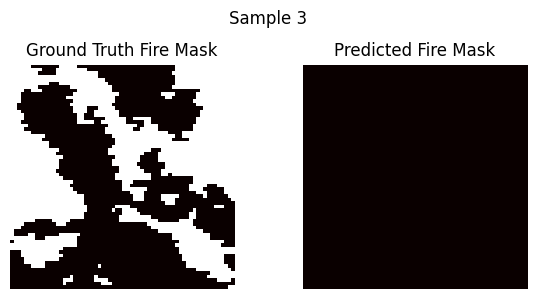

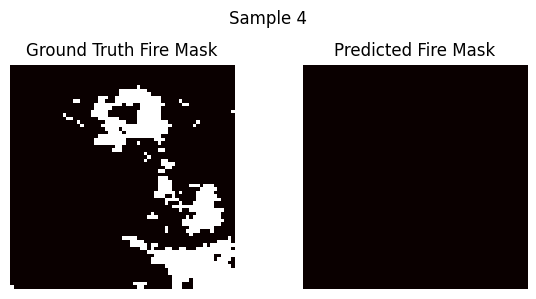

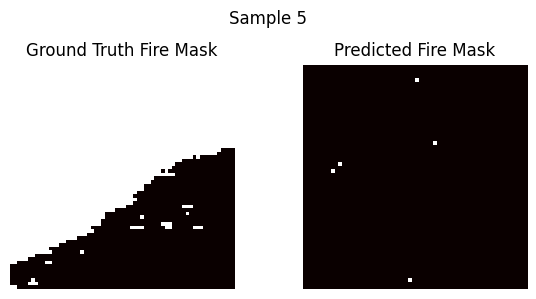

In [17]:
model_path = 'models/fire_segnet_best_20250509_201412.pth'
num_samples = 5
###########
# Load model 
model = FireSegNet().to(DEVICE)
model.load_state_dict(torch.load('models/fire_segnet_best_20250509_201412.pth', map_location=DEVICE))
model.eval()

# Load validation data
val_paths = sorted(glob("archive/next_day_wildfire_spread_eval_*.tfrecord"))
val_loader = DataLoader(WildfireTFRecordDataset(val_paths), batch_size=1)

# Get samples
samples = list(itertools.islice(val_loader, num_samples))

for i, (x, y_true) in enumerate(samples):
    # Get prediction
    with torch.no_grad():
        x = x.to(DEVICE)
        logits = model(x)
        y_pred = torch.argmax(logits, dim=1)
    y_true = y_true.cpu().numpy()[0]
    y_pred = y_pred.cpu().numpy()[0]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6,3))
    
    # Plot ground truth
    ax1.imshow(y_true, cmap='hot')
    ax1.set_title('Ground Truth Fire Mask')
    ax1.axis('off')
    
    # Plot prediction
    ax2.imshow(y_pred, cmap='hot')
    ax2.set_title('Predicted Fire Mask')
    ax2.axis('off')
    
    plt.suptitle(f'Sample {i+1}')
    plt.tight_layout()
    plt.show()